## VGG Pretrained Model

import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the VGG16 model
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

In [3]:
base_model.layers

In [4]:
# Freeze the weights of the VGG16 model
for layer in base_model.layers:
    layer.trainable = False

In [5]:
# Now Add the Output layers
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [6]:
# Complile the Model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
train_dir = 'artifacts/cat-dog-data/train'
validation_dir = 'artifacts/cat-dog-data/validation'

image_size = (224,224)
batch_size = 15

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values to the range [0, 1]
    rotation_range=20,  # Example of data augmentation parameter
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function= preprocess_input
)

validation_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    preprocessing_function= preprocess_input
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    classes=['Dog', 'Cat'],
    class_mode='binary',
    shuffle=True
)

validation_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size=image_size,
    batch_size=batch_size,
    classes=['Dog', 'Cat'],
    class_mode='binary',
    shuffle=True
)

Found 337 images belonging to 2 classes.
Found 59 images belonging to 2 classes.


In [11]:
train_generator.samples

337

In [12]:
# Train the model
history = model.fit(
    train_generator, 
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/10


2023-08-21 22:14:10.483112: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


22/22 [==============================] - ETA: 0s - loss: 2.2792 - accuracy: 0.5776

2023-08-21 22:14:37.817575: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


22/22 [==============================] - 31s 1s/step - loss: 2.2792 - accuracy: 0.5776 - val_loss: 0.5315 - val_accuracy: 0.7111
Epoch 2/10
22/22 [==============================] - 32s 1s/step - loss: 0.7665 - accuracy: 0.7081 - val_loss: 0.4006 - val_accuracy: 0.7778
Epoch 3/10
22/22 [==============================] - 32s 1s/step - loss: 0.3972 - accuracy: 0.8478 - val_loss: 0.4409 - val_accuracy: 0.7556
Epoch 4/10
22/22 [==============================] - 32s 1s/step - loss: 0.3309 - accuracy: 0.8478 - val_loss: 0.3183 - val_accuracy: 0.8444
Epoch 5/10
22/22 [==============================] - 32s 1s/step - loss: 0.3398 - accuracy: 0.8323 - val_loss: 0.3109 - val_accuracy: 0.8667
Epoch 6/10
22/22 [==============================] - 32s 1s/step - loss: 0.2818 - accuracy: 0.8634 - val_loss: 0.4340 - val_accuracy: 0.8222
Epoch 7/10
22/22 [==============================] - 32s 1s/step - loss: 0.3105 - accuracy: 0.8634 - val_loss: 0.2847 - val_accuracy: 0.8444
Epoch 8/10
22/22 [=============

In [13]:
# Predict Image

In [21]:
input_image = cv2.imread('artifacts/dog.jpeg')
input_image.shape

(192, 262, 3)

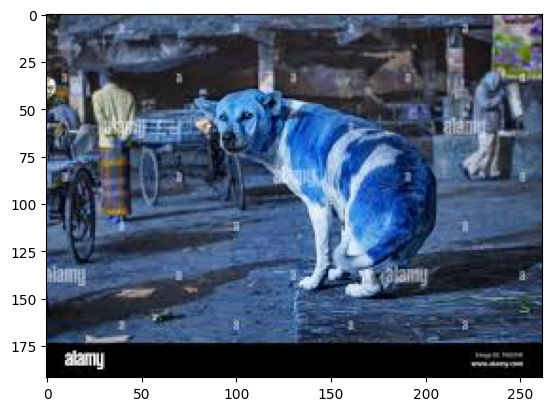

In [22]:
plt.imshow(input_image)
plt.show()

In [23]:
input_image = cv2.resize(input_image, (224,224))
input_image = np.expand_dims(input_image, axis=0)
input_image = preprocess_input(input_image)

In [24]:
input_image.shape

(1, 224, 224, 3)

In [25]:
y_pred = model.predict(input_image)

1/1 [==============================] - 0s 100ms/step


In [26]:
y_pred[0][0]

0.0

In [27]:
threshold = 0.5
binary_prediction = 1 if y_pred[0][0] > threshold else 0
print("Binary Prediction (Class 1 if > 0.5):", binary_prediction)

Binary Prediction (Class 1 if > 0.5): 0
